In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("all_data.csv")
data

,callsign,typecode,origin,destination,firstseen,lastseen,day
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2019-01-01 00:00:00+00:00
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2019-01-01 00:00:00+00:00
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2019-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...
42424537,N749SF,B407,K1H0,MO35,2022-12-31 23:38:12+00:00,2022-12-31 23:57:10+00:00,2022-12-31 00:00:00+00:00
42424538,SDA289,C208,NZWN,NZWB,2022-12-31 23:42:19+00:00,2022-12-31 23:57:29+00:00,2022-12-31 00:00:00+00:00
42424539,N988NW,FA7X,KPBI,KFLL,2022-12-31 23:42:27+00:00,2022-12-31 23:57:27+00:00,2022-12-31 00:00:00+00:00
42424540,N835CS,EC35,MS90,K08M,2022-12-31 23:44:12+00:00,2022-12-31 23:58:55+00:00,2022-12-31 00:00:00+00:00


In [3]:
icao=pd.read_csv("iata-icao.csv")
icao

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Abu Zaby,AAN,OMAL,Al Ain International Airport,24.2617,55.6092
1,AE,Abu Zaby,AUH,OMAA,Abu Dhabi International Airport,24.4330,54.6511
2,AE,Abu Zaby,AYM,NaN,Yas Island Seaplane Base,24.4670,54.6103
3,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
4,AE,Abu Zaby,DHF,OMAM,Al Dhafra Air Base,24.2482,54.5477
...,...,...,...,...,...,...,...
8932,ZW,Masvingo,MVZ,FVMV,Masvingo Airport,-20.0553,30.8591
8933,ZW,Matabeleland North,HWN,FVWN,Hwange National Park Airport,-18.6299,27.0210
8934,ZW,Matabeleland North,VFA,FVFA,Victoria Falls Airport,-18.0959,25.8390
8935,ZW,Matabeleland North,WKI,FVWT,Hwange Town Airport,-18.3630,26.5198


In [4]:
uniqO = data['origin'].unique()
uniqO_df = pd.DataFrame(uniqO)
uniqO_df

,0
0,YSSY
1,LEMD
2,UUEE
3,KLDJ
4,WIII
...,...
15273,RJSF
15274,LERI
15275,SC19
15276,45WY


In [5]:
duniqO = icao['icao'].unique()
duniqO_df = pd.DataFrame(duniqO)
duniqO_df

,0
0,OMAL
1,OMAA
2,NaN
3,OMAD
4,OMAM
...,...
7787,FVMV
7788,FVWN
7789,FVFA
7790,FVWT


In [6]:
# Filter the DataFrame
filter_major_planetype = data[data['typecode'].str.startswith(('A3', 'B7', 'E1','DH','CRJ'))]

# Print the filtered DataFrame
filter_major_planetype

,callsign,typecode,origin,destination,firstseen,lastseen,day
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2019-01-01 00:00:00+00:00
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2019-01-01 00:00:00+00:00
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2019-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...
42424528,ENY3800,E145,KORD,KCMI,2022-12-31 23:30:50+00:00,2022-12-31 23:56:58+00:00,2022-12-31 00:00:00+00:00
42424530,CFHAJ,DH3T,CYVR,CYVR,2022-12-31 23:32:33+00:00,2022-12-31 23:52:52+00:00,2022-12-31 00:00:00+00:00
42424531,VTE565,E145,KMQY,KBNA,2022-12-31 23:34:30+00:00,2022-12-31 23:47:15+00:00,2022-12-31 00:00:00+00:00
42424534,CFPCG,DHC2,2WA3,CYVR,2022-12-31 23:36:52+00:00,2022-12-31 23:50:34+00:00,2022-12-31 00:00:00+00:00


In [7]:
# Filter the DataFrame to include only rows where the callsign starts with three letters
filtered_df = filter_major_planetype[filter_major_planetype['callsign'].str.match(r'^[A-Z]{3}')]
# This regex: ^[A-Z]{3} ensures the string starts (^) with exactly three capital letters ([A-Z]{3})
filtered_com_major = filtered_df[~filtered_df['callsign'].str.match(r'^[A-Z]+$')]
# This regex: ^[A-Z]+$ matches strings that start and end with one or more capital letters


filtered_com_major

,callsign,typecode,origin,destination,firstseen,lastseen,day
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2019-01-01 00:00:00+00:00
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2019-01-01 00:00:00+00:00
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2019-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...
42424525,PDT6131,E145,KMDT,KPHL,2022-12-31 23:29:15+00:00,2022-12-31 23:50:46+00:00,2022-12-31 00:00:00+00:00
42424527,JZA319,DH8D,CYQQ,CYVR,2022-12-31 23:30:43+00:00,2022-12-31 23:51:42+00:00,2022-12-31 00:00:00+00:00
42424528,ENY3800,E145,KORD,KCMI,2022-12-31 23:30:50+00:00,2022-12-31 23:56:58+00:00,2022-12-31 00:00:00+00:00
42424531,VTE565,E145,KMQY,KBNA,2022-12-31 23:34:30+00:00,2022-12-31 23:47:15+00:00,2022-12-31 00:00:00+00:00


In [8]:
unique_typecodes = filtered_com_major['typecode'].unique()

# Create a dictionary with all values under one key
PlaneTypes = {'Typecode': list(unique_typecodes)}

# Convert the dictionary to a DataFrame
PlaneTypes_df = pd.DataFrame(PlaneTypes)

# Display the DataFrame
PlaneTypes_df = PlaneTypes_df.sort_values(by='Typecode')
PlaneTypes_df


,Typecode
35,A306
59,A30B
15,A310
42,A318
20,A319
...,...
29,E145
30,E170
72,E175
27,E190


In [9]:
uniqO = filtered_com_major['origin'].unique()
uniqO_df = pd.DataFrame(uniqO)
uniqO_df

,0
0,YSSY
1,LEMD
2,UUEE
3,KLDJ
4,WIII
...,...
5753,EG03
5754,KSTK
5755,LGLR
5756,KSFQ


In [10]:
uniqD = filtered_com_major['destination'].unique()
uniqD_df = pd.DataFrame(uniqD)
uniqD_df

,0
0,EDDF
1,LEMD
2,LFPG
3,RPLL
4,KLAX
...,...
10755,4WI9
10756,LSZC
10757,KAKO
10758,ORUQ


In [11]:
filtered_com_major['day'] = pd.to_datetime(filtered_com_major['day'])
filtered_com_major

,callsign,typecode,origin,destination,firstseen,lastseen,day
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00
1,AEA040,A332,LEMD,LEMD,2018-12-31 01:07:21+00:00,2019-01-01 03:32:59+00:00,2019-01-01 00:00:00+00:00
2,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00
3,CLU211,B744,UUEE,EDDF,2018-12-31 01:49:28+00:00,2019-01-01 04:11:38+00:00,2019-01-01 00:00:00+00:00
4,ETH704,B788,KLDJ,LFPG,2018-12-31 03:31:48+00:00,2019-01-01 04:30:10+00:00,2019-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...
42424525,PDT6131,E145,KMDT,KPHL,2022-12-31 23:29:15+00:00,2022-12-31 23:50:46+00:00,2022-12-31 00:00:00+00:00
42424527,JZA319,DH8D,CYQQ,CYVR,2022-12-31 23:30:43+00:00,2022-12-31 23:51:42+00:00,2022-12-31 00:00:00+00:00
42424528,ENY3800,E145,KORD,KCMI,2022-12-31 23:30:50+00:00,2022-12-31 23:56:58+00:00,2022-12-31 00:00:00+00:00
42424531,VTE565,E145,KMQY,KBNA,2022-12-31 23:34:30+00:00,2022-12-31 23:47:15+00:00,2022-12-31 00:00:00+00:00


In [12]:
filtered_com_major.dtypes

callsign                    object
typecode                    object
origin                      object
destination                 object
firstseen                   object
lastseen                    object
day            datetime64[ns, UTC]
dtype: object

In [13]:
count_before = filtered_com_major.groupby('day').count()
count_before

,callsign,typecode,origin,destination,firstseen,lastseen
day,,,,,,
2019-01-01 00:00:00+00:00,18127,18127,18127,18127,18127,18127
2019-01-02 00:00:00+00:00,21424,21424,21424,21424,21424,21424
2019-01-03 00:00:00+00:00,22032,22032,22032,22032,22032,22032
2019-01-04 00:00:00+00:00,22385,22385,22385,22385,22385,22385
2019-01-05 00:00:00+00:00,19436,19436,19436,19436,19436,19436
...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,15730,15730,15730,15730,15730,15730
2022-12-28 00:00:00+00:00,20183,20183,20183,20183,20183,20183
2022-12-29 00:00:00+00:00,21031,21031,21031,21031,21031,21031


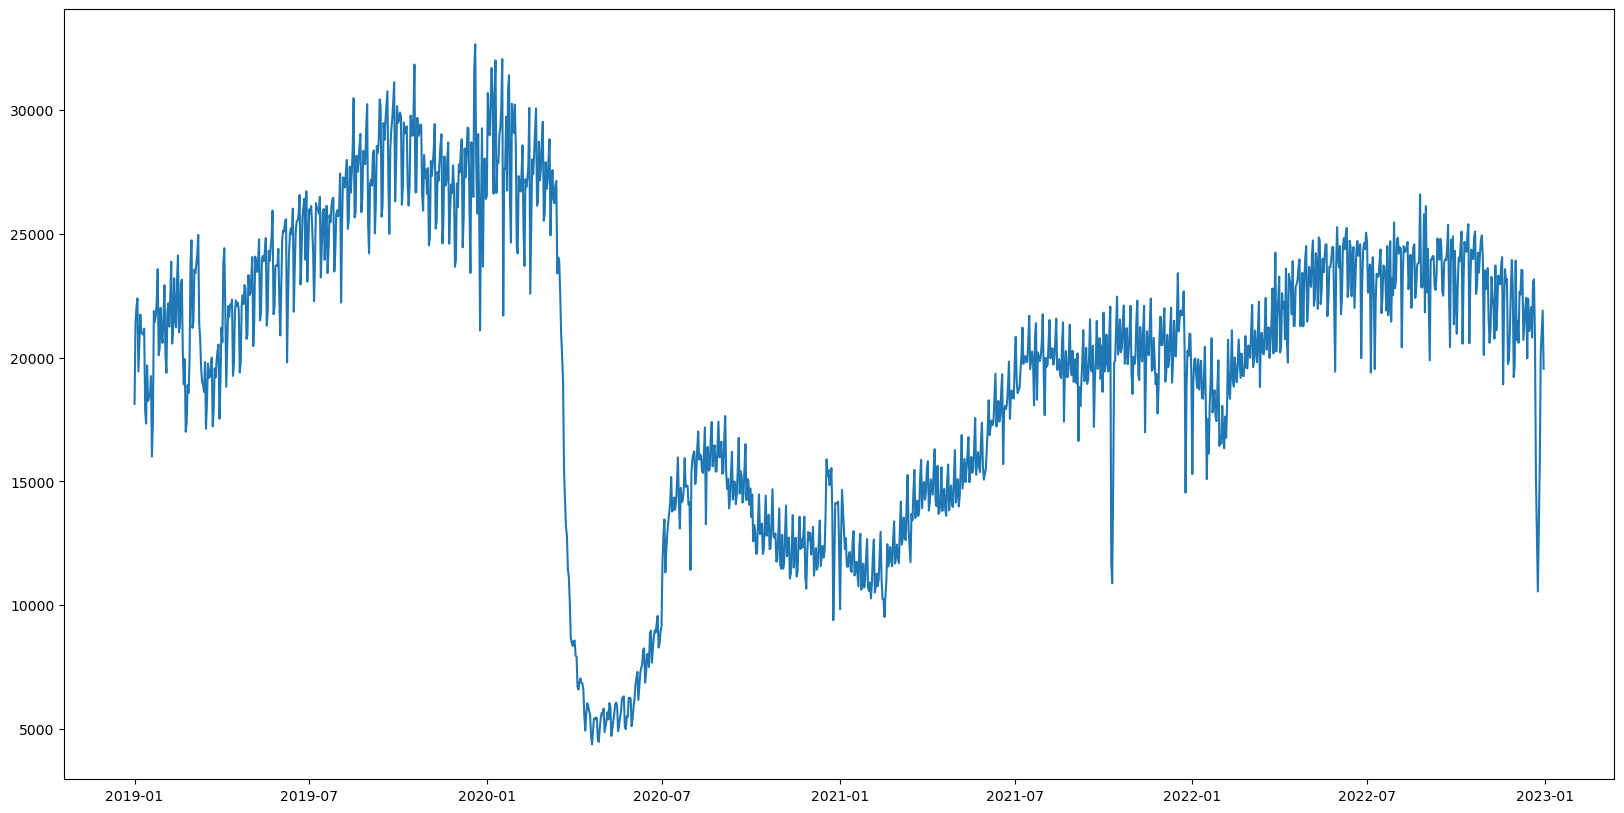

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(count_before['callsign'])
plt.show()

In [22]:
icaoO = pd.DataFrame()
icaoO['origin'] = icao['icao']
icaoO['Olatitude'] = icao['latitude']
icaoO['Olongitude'] = icao['longitude'] 

filtered_com_major_final = pd.merge(filtered_com_major, icaoO, on='origin', how='inner')

In [23]:
filtered_com_major_final

,callsign,typecode,origin,destination,firstseen,lastseen,day,Olatitude_x,Olongitude_x,Olatitude_y,Olongitude_y
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770,-33.9461,151.1770
1,CXA825,B788,YSSY,LFPG,2018-12-31 01:18:29+00:00,2019-01-01 04:32:28+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770,-33.9461,151.1770
2,HVN55,B789,YSSY,EGLL,2018-12-31 04:37:28+00:00,2019-01-01 06:44:42+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770,-33.9461,151.1770
3,BAW16,B77W,YSSY,EGLL,2018-12-31 05:50:41+00:00,2019-01-01 05:18:06+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770,-33.9461,151.1770
4,QFA1,A388,YSSY,EGLL,2018-12-31 06:28:52+00:00,2019-01-01 06:03:57+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770,-33.9461,151.1770
...,...,...,...,...,...,...,...,...,...,...,...
27108567,SKW5843,CRJ2,KCPR,KDEN,2022-12-31 15:03:40+00:00,2022-12-31 15:40:05+00:00,2022-12-31 00:00:00+00:00,42.9080,-106.4640,42.9080,-106.4640
27108568,SKW4658,CRJ2,KCPR,KDEN,2022-12-31 20:47:17+00:00,2022-12-31 21:24:52+00:00,2022-12-31 00:00:00+00:00,42.9080,-106.4640,42.9080,-106.4640
27108569,SKW5809,CRJ2,KCPR,KDEN,2022-12-31 22:31:01+00:00,2022-12-31 23:08:36+00:00,2022-12-31 00:00:00+00:00,42.9080,-106.4640,42.9080,-106.4640
27108570,CVU90,DHC6,KSTK,KDEN,2022-12-27 17:48:08+00:00,2022-12-27 18:22:06+00:00,2022-12-27 00:00:00+00:00,40.6153,-103.2650,40.6153,-103.2650


In [24]:
icaoD = pd.DataFrame()
icaoD['destination'] = icao['icao']
icaoD['Dlatitude'] = icao['latitude']
icaoD['Dlongitude'] = icao['longitude'] 

filtered_com_major_final = pd.merge(filtered_com_major_final, icaoD, on='destination', how='inner')

In [25]:
filtered_com_major_final

,callsign,typecode,origin,destination,firstseen,lastseen,day,Olatitude_x,Olongitude_x,Olatitude_y,Olongitude_y,Dlatitude,Dlongitude
0,CES219,A332,YSSY,EDDF,2018-12-31 01:05:29+00:00,2019-01-01 04:09:29+00:00,2019-01-01 00:00:00+00:00,-33.9461,151.1770,-33.9461,151.1770,50.0333,8.57056
1,SIA26,A388,YSSY,EDDF,2019-01-02 05:19:34+00:00,2019-01-03 05:34:24+00:00,2019-01-03 00:00:00+00:00,-33.9461,151.1770,-33.9461,151.1770,50.0333,8.57056
2,SIA26,A388,YSSY,EDDF,2019-01-03 05:29:15+00:00,2019-01-04 05:13:38+00:00,2019-01-04 00:00:00+00:00,-33.9461,151.1770,-33.9461,151.1770,50.0333,8.57056
3,SIA26,A388,YSSY,EDDF,2019-01-04 05:23:35+00:00,2019-01-05 05:58:27+00:00,2019-01-05 00:00:00+00:00,-33.9461,151.1770,-33.9461,151.1770,50.0333,8.57056
4,HVN37,B789,YSSY,EDDF,2019-01-05 04:38:41+00:00,2019-01-06 05:15:59+00:00,2019-01-06 00:00:00+00:00,-33.9461,151.1770,-33.9461,151.1770,50.0333,8.57056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24088250,GOJUMP4,DHC6,KOKB,KOKB,2022-07-31 21:34:23+00:00,2022-07-31 21:56:17+00:00,2022-07-31 00:00:00+00:00,33.2173,-117.3540,33.2173,-117.3540,33.2173,-117.35400
24088251,GOJUMP4,DHC6,KOKB,KOKB,2022-08-01 20:32:15+00:00,2022-08-01 20:47:10+00:00,2022-08-01 00:00:00+00:00,33.2173,-117.3540,33.2173,-117.3540,33.2173,-117.35400
24088252,SKW405L,CRJ2,KMEI,KLUL,2022-10-03 21:33:17+00:00,2022-10-03 21:43:19+00:00,2022-10-03 00:00:00+00:00,32.3326,-88.7519,32.3326,-88.7519,31.6726,-89.17220
24088253,SKW405L,CRJ2,KMEI,KLUL,2022-10-19 21:26:08+00:00,2022-10-19 21:37:29+00:00,2022-10-19 00:00:00+00:00,32.3326,-88.7519,32.3326,-88.7519,31.6726,-89.17220


In [26]:
count_after = filtered_com_major_final.groupby('day').count()
count_after

,callsign,typecode,origin,destination,firstseen,lastseen,Olatitude_x,Olongitude_x,Olatitude_y,Olongitude_y,Dlatitude,Dlongitude
day,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,14471,14471,14471,14471,14471,14471,14471,14471,14471,14471,14471,14471
2019-01-02 00:00:00+00:00,16955,16955,16955,16955,16955,16955,16955,16955,16955,16955,16955,16955
2019-01-03 00:00:00+00:00,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618,17618
2019-01-04 00:00:00+00:00,17989,17989,17989,17989,17989,17989,17989,17989,17989,17989,17989,17989
2019-01-05 00:00:00+00:00,15715,15715,15715,15715,15715,15715,15715,15715,15715,15715,15715,15715
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,13765,13765,13765,13765,13765,13765,13765,13765,13765,13765,13765,13765
2022-12-28 00:00:00+00:00,17778,17778,17778,17778,17778,17778,17778,17778,17778,17778,17778,17778
2022-12-29 00:00:00+00:00,18448,18448,18448,18448,18448,18448,18448,18448,18448,18448,18448,18448


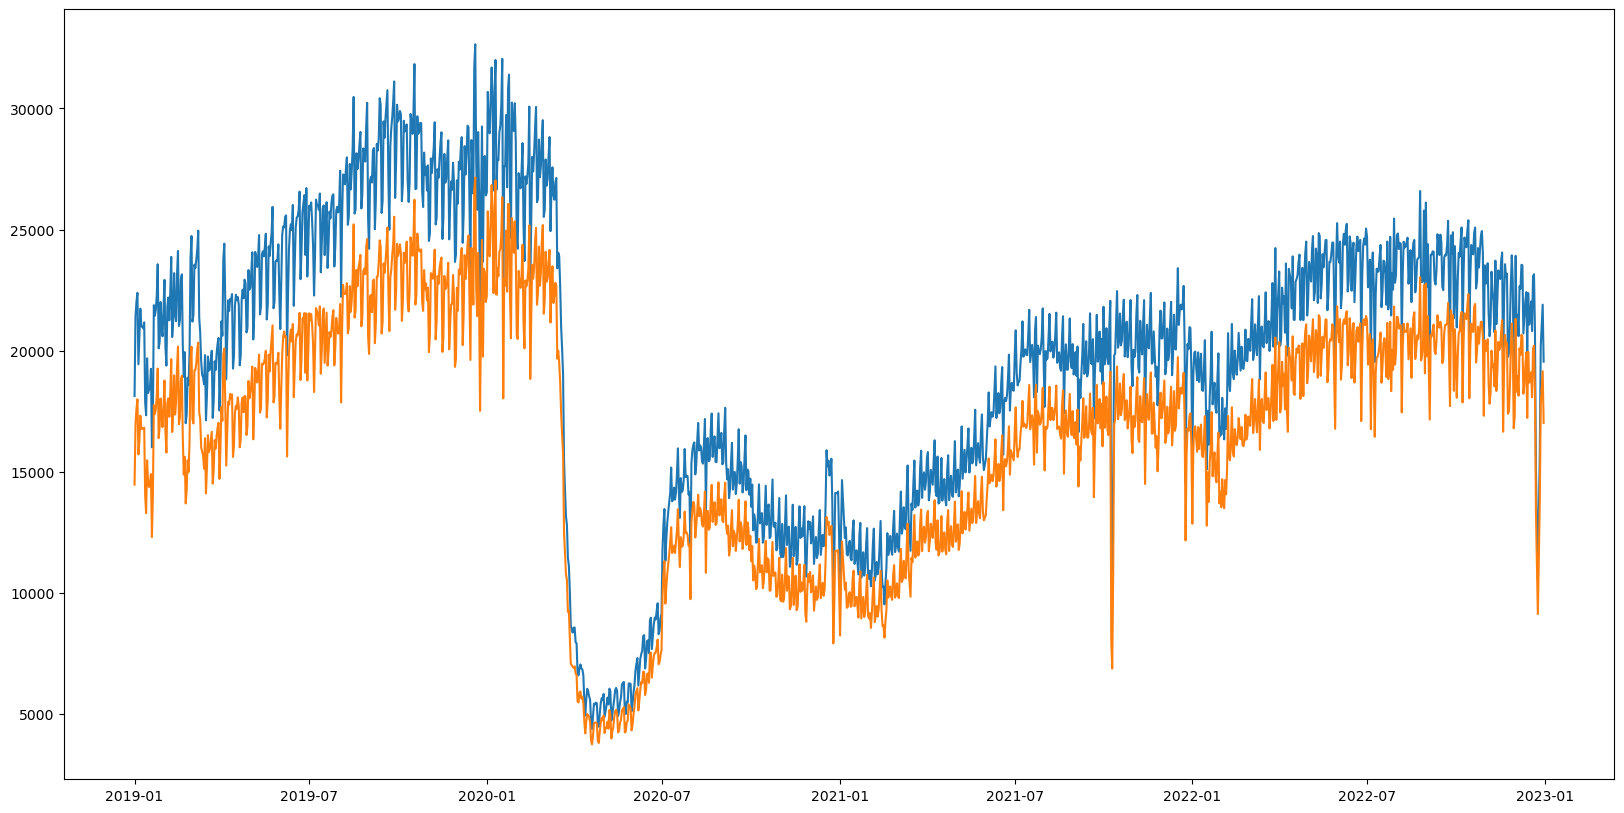

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(count_before['callsign'])
plt.plot(count_after['callsign'])
plt.show()

In [31]:

icao_set = set(icao['icao'])
destination_set = set(filtered_com_major['destination'])

# Calculate elements in row 0 not in row 1
dest_not_in_icao = destination_set.difference(icao_set)
dest_not_in_icao

{'86GA',
 'CRM4',
 'MS50',
 '6OR8',
 '0IA6',
 '5MO1',
 '2IN6',
 'MU23',
 'VG24',
 '7VA5',
 '2FA9',
 'K09M',
 'LIDH',
 'II74',
 '41NY',
 '09VA',
 '03MA',
 '4NY0',
 '63II',
 'OI58',
 'KAXH',
 'KW41',
 'KSPZ',
 'SC16',
 '25MD',
 'MS13',
 'K0R5',
 '8MI3',
 'EYMM',
 'TA65',
 '1XA4',
 '95WA',
 'MA97',
 'LGTL',
 '25VA',
 'FA51',
 'K6G0',
 'K19N',
 'KCMR',
 'EDXZ',
 'OG08',
 'NK53',
 'SWPV',
 'UK61',
 'K1Q2',
 '2ND0',
 '5TX6',
 'KS94',
 'OA19',
 'SWOA',
 'EDGP',
 'KLZD',
 '1ND3',
 '23CO',
 'NK43',
 '0IN5',
 'KFFC',
 'LFOL',
 '6NE0',
 '86OH',
 'FD88',
 '1II8',
 '3IS3',
 'CKH8',
 '1VA1',
 'IA21',
 '2OH2',
 'EBAV',
 'EDVN',
 'TN47',
 'FD92',
 'YMPC',
 'KIWH',
 '0GA4',
 'MA89',
 'FL50',
 'EDAV',
 'TA07',
 'CCM3',
 '8NC2',
 '5FD5',
 'SSJC',
 'LFIT',
 '4VA8',
 'KRNP',
 '1TX5',
 '95GA',
 'XA10',
 '0CL3',
 'LAGJ',
 '9AR4',
 '38MI',
 'KN96',
 '0OK9',
 'KL88',
 'LFGF',
 '09IA',
 '23OA',
 'VIDD',
 'RJOY',
 'LW70',
 'K17N',
 'SDVH',
 'CML2',
 'XS05',
 '0PN5',
 '18TE',
 'YLYD',
 '7MO4',
 'EDKD',
 'LTAB',
 

In [32]:
len(dest_not_in_icao)

8013